In [1]:
from notebook_tools import *
%matplotlib inline

# pp-SRC analysis

In [2]:
variables = [
             'Xb'   ,'Pmiss.P()'    ,'Pmiss.Pt()'   ,'theta_pq'     ,'p_over_q' , 'Pcm.Mag()' 
             ,'Q2' , 'Plead.Phi()' , 'Prec.Phi()' , 'Pmiss.Phi()'
             ,'TMath::RadToDeg()*theta_rec_q' ,'TMath::RadToDeg()*theta_miss_q'
             ,'pEdep[0]', 'protons[0].P()', 'pEdep[1]', 'protons[1].P()'
             ,'TMath::RadToDeg()*protons[0].Theta()',  'TMath::RadToDeg()*protons[1].Theta()' 
             ,'alpha[0]','alpha[1]'
             ,'pcmX','pcmY','pcmZ','Pcm.P()'
            ]

In [3]:
A=12
ana_12C_eep = TAnalysisEG2( path+"/AnaFiles" , "Ana_eep_in_ppSRCcut_DATA_%s"%dm.Target(A) , ROOT.TCut() )
anarr_12C_eep = tree2array( ana_12C_eep.GetTree() , branches=variables , selection=None )
ana_12C = TAnalysisEG2( path+"/AnaFiles" , "Ana_ppSRCCut_DATA_%s"%dm.Target(A) , ROOT.TCut() )
anarr_12C = tree2array( ana_12C.GetTree() , branches=variables , selection=None )
df_12C = read_root( path+"/AnaFiles/Ana_ppSRCcut_DATA_C12.root" , columns=['Xb','pcmX','pcmY','pcmZ'] )

In [5]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
anarr_12C_Pmbins , anarr_12C_eep_Pmbins = [] , []
for PmissBin in PmissBins:
    anarr_12C_eep_Pmbins.append(anarr_12C_eep[(PmissBin[0] < anarr_12C_eep['Pmiss.P()']) & (anarr_12C_eep['Pmiss.P()'] < PmissBin[1])])
    anarr_12C_Pmbins.append(anarr_12C[(PmissBin[0] < anarr_12C['Pmiss.P()']) & (anarr_12C['Pmiss.P()'] < PmissBin[1])])
    print "in %.2f<p(miss)<%.2f GeV/c, %d (e,e'p) / %d (e,e'pp)"%(PmissBin[0],PmissBin[1],len(anarr_12C_Pmbins[-1]),len(anarr_12C_eep_Pmbins[-1]))

in 0.30<p(miss)<0.45 GeV/c, 71 (e,e'p) / 4821 (e,e'pp)
in 0.45<p(miss)<0.55 GeV/c, 143 (e,e'p) / 2716 (e,e'pp)
in 0.55<p(miss)<0.65 GeV/c, 132 (e,e'p) / 1677 (e,e'pp)
in 0.65<p(miss)<0.75 GeV/c, 96 (e,e'p) / 830 (e,e'pp)
in 0.75<p(miss)<1.00 GeV/c, 56 (e,e'p) / 415 (e,e'pp)


In [6]:
Q2Bins = [[0,1.5]     , [1.5,2]     , [2,2.5]      , [2.5,5]]
anarr_12C_Q2bins , anarr_12C_eep_Q2bins = [] , []
for Q2Bin in Q2Bins:
    anarr_12C_eep_Q2bins.append(anarr_12C_eep[(Q2Bin[0] < anarr_12C_eep['Q2']) & (anarr_12C_eep['Q2'] < Q2Bin[1])])
    anarr_12C_Q2bins.append(anarr_12C[(Q2Bin[0] < anarr_12C['Q2']) & (anarr_12C['Q2'] < Q2Bin[1])])
    print "in %.2f<Q2<%.2f GeV/c, %d (e,e'p) / %d (e,e'pp)"%(Q2Bin[0],Q2Bin[1],len(anarr_12C_Q2bins[-1]),len(anarr_12C_eep_Q2bins[-1]))

in 0.00<Q2<1.50 GeV/c, 58 (e,e'p) / 1629 (e,e'pp)
in 1.50<Q2<2.00 GeV/c, 199 (e,e'p) / 4744 (e,e'pp)
in 2.00<Q2<2.50 GeV/c, 129 (e,e'p) / 2319 (e,e'pp)
in 2.50<Q2<5.00 GeV/c, 112 (e,e'p) / 1737 (e,e'pp)


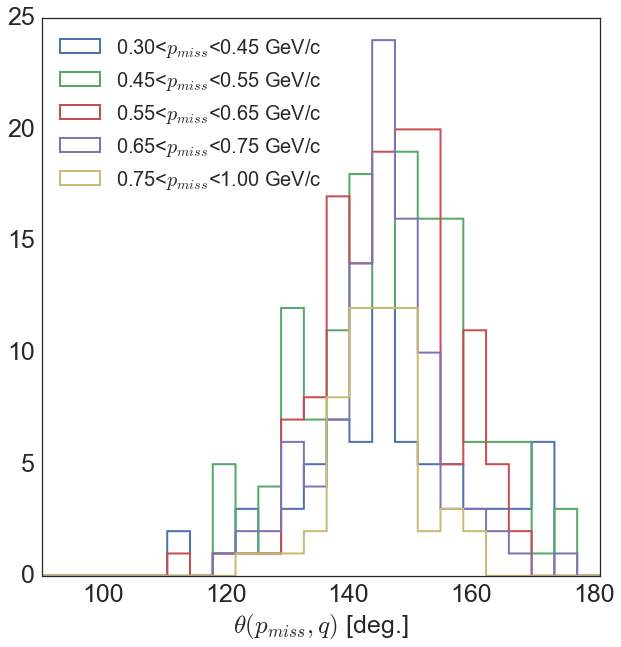

In [7]:
fig,ax=plt.subplots(figsize=(10,10))
ax.set_xlim(90,181)
for PmissBin,anarr_12C_Pmbin in zip(PmissBins,anarr_12C_Pmbins):
    plt.hist(anarr_12C_Pmbin['TMath::RadToDeg()*theta_miss_q'],
             bins=np.linspace(-1,181,50),label='%.2f<$p_{miss}$<%.2f GeV/c'%(PmissBin[0],PmissBin[1]),
             histtype='step', linewidth=2);
pt.set_axes(ax,'$\\theta(p_{miss},q)$ [deg.]','')
plt.legend(fontsize=20,loc='upper left')

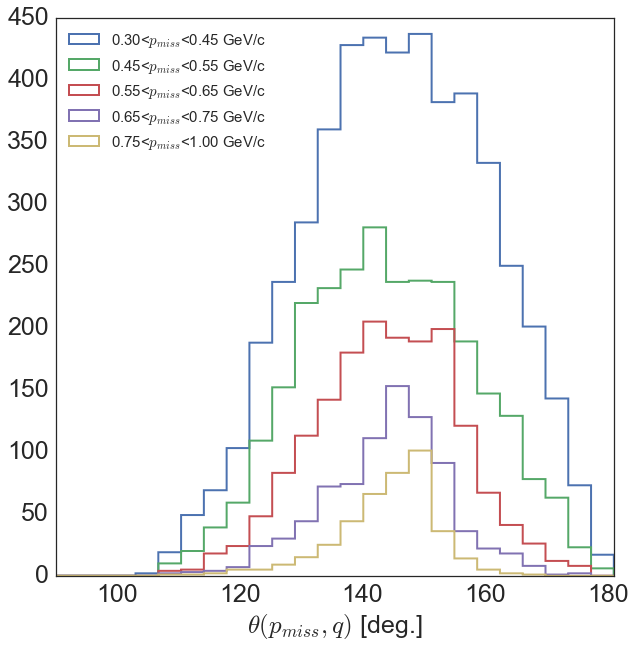

In [8]:
fig,ax=plt.subplots(figsize=(10,10))
ax.set_xlim(90,181)
for PmissBin,anarr_12C_eep_Pmbin in zip(PmissBins,anarr_12C_eep_Pmbins):
    plt.hist(anarr_12C_eep_Pmbin['TMath::RadToDeg()*theta_miss_q'],
             bins=np.linspace(-1,181,50),label='%.2f<$p_{miss}$<%.2f GeV/c'%(PmissBin[0],PmissBin[1]),
             histtype='step', linewidth=2);
pt.set_axes(ax,'$\\theta(p_{miss},q)$ [deg.]','')
plt.legend(fontsize=15,loc='upper left')
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/ep/Theta_pmiss_q.pdf')

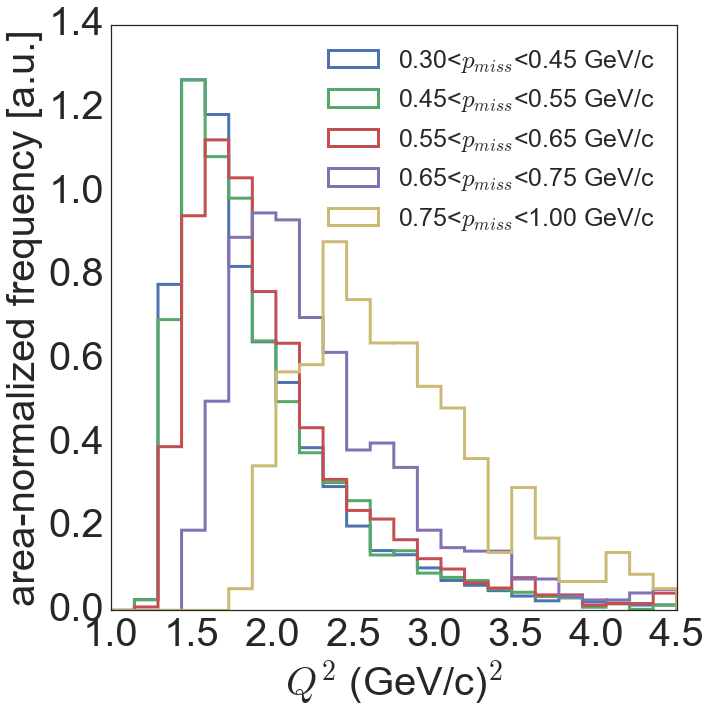

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
for PmissBin,anarr_12C_eep_Pmbin in zip(PmissBins,anarr_12C_eep_Pmbins):
    plt.hist(anarr_12C_eep_Pmbin['Q2'],
             bins=np.linspace(1.,4.5,25),label='%.2f<$p_{miss}$<%.2f GeV/c'%(PmissBin[0],PmissBin[1]),
             histtype='step', linewidth=3 , normed=1);
pt.set_axes(ax,'$Q^{2}$ (GeV/c)$^{2}$','area-normalized frequency [a.u.]',fontsize=40)
ax.set_xlim(1.,4.5)
plt.legend(fontsize=25,loc='upper right')
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/ep/Q2inPmissBins.pdf')

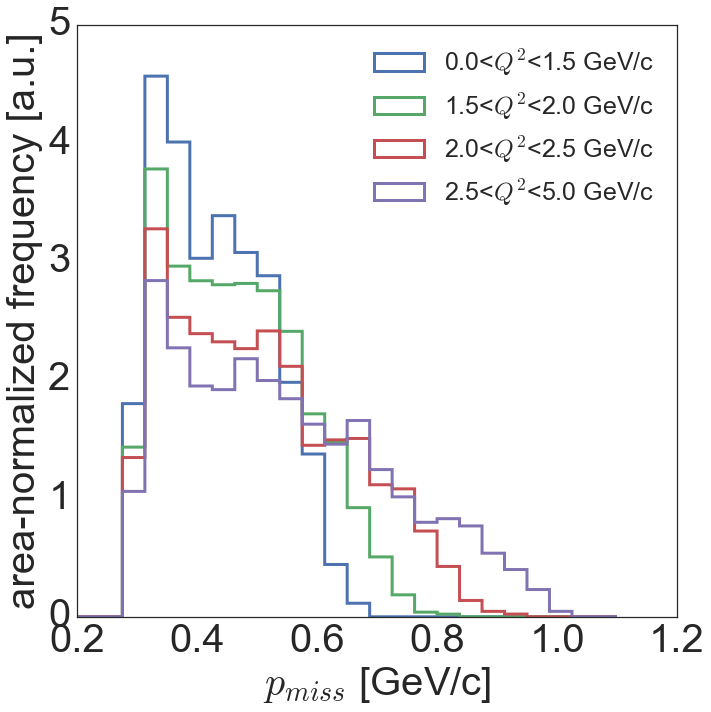

In [17]:
fig,ax=plt.subplots(figsize=(10,10))
for Q2bin,anarr_12C_eep_Q2bin in zip(Q2Bins,anarr_12C_eep_Q2bins):
    plt.hist(anarr_12C_eep_Q2bin['Pmiss.P()'],
             bins=np.linspace(0.2,1.1,25),label='%.1f<$Q^{2}$<%.1f GeV/c'%(Q2bin[0],Q2bin[1]),
             histtype='step', linewidth=3 , normed=1);
pt.set_axes(ax,'$p_{miss}$ [GeV/c]','area-normalized frequency [a.u.]',fontsize=40)
plt.legend(fontsize=25,loc='upper right')
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/ep/PmissinQ2Bins.pdf')

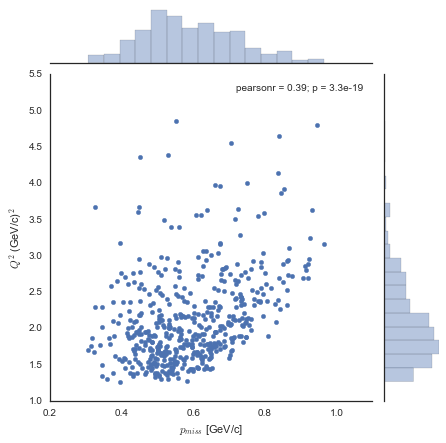

In [5]:
g = sns.jointplot(anarr_12C['Pmiss.P()'],anarr_12C['Q2'],cmap='hot_r')
g.set_axis_labels(xlabel='$p_{miss}$ [GeV/c]',ylabel='$Q^{2}$ (GeV/c)$^{2}$')
g.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/ep/Q2vsPm.pdf')

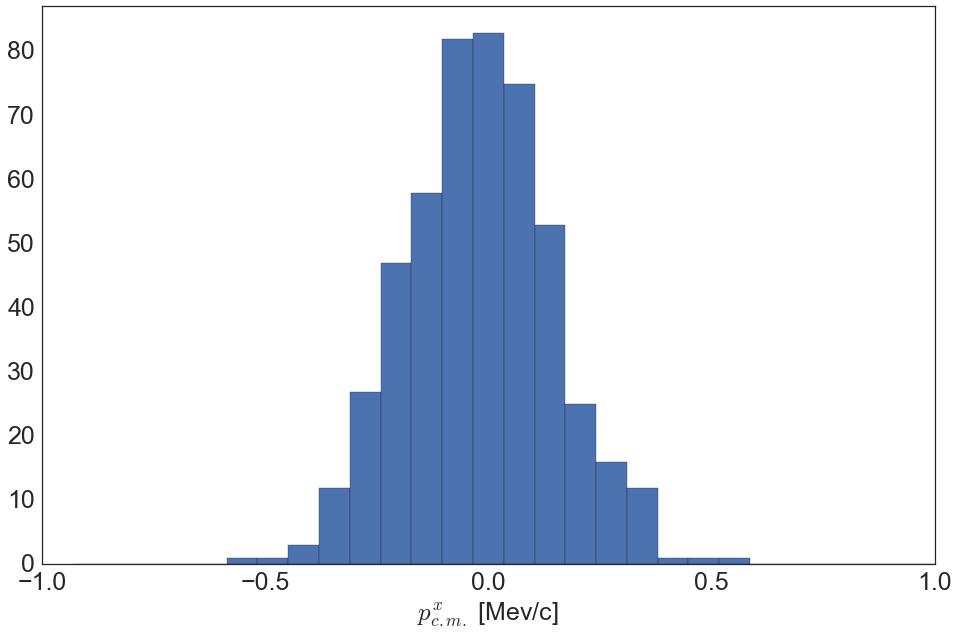

In [6]:
ax , h , bins , patches = plot_1d_hist( df_12C.pcmX , 
                                       bins=np.linspace(-1,1,30) ,
                                       xlabel='$p^{x}_{c.m.}$ [Mev/c]' , figsize=(16,10));


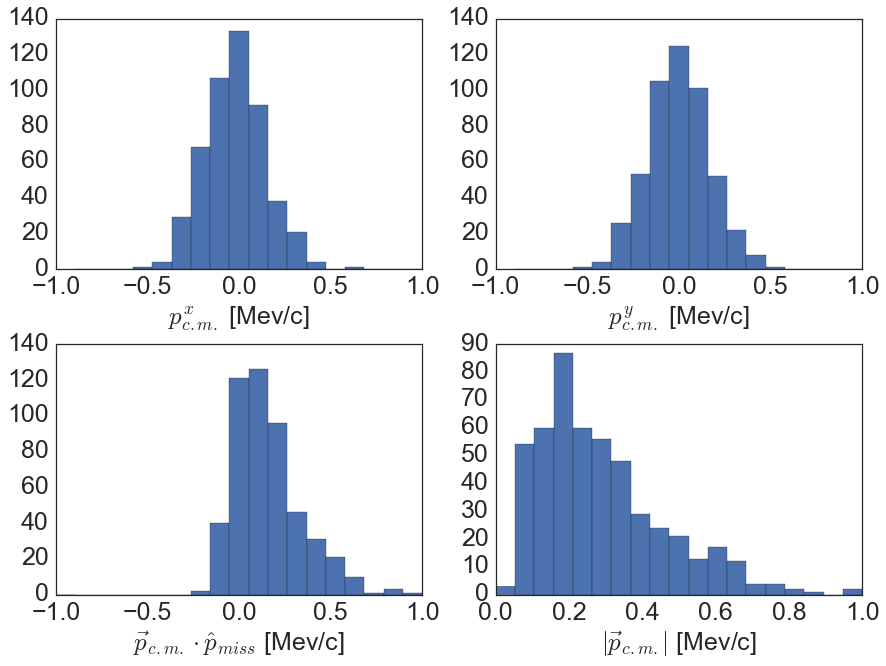

In [7]:
figure = plt.figure(figsize=(14,10))
bins=np.linspace(-1,1,20) 
ax=figure.add_subplot(221)
plt.hist( df_12C.pcmX , bins=bins)
set_axes(ax , x_label='$p^{x}_{c.m.}$ [Mev/c]')

ax=figure.add_subplot(222)
plt.hist( df_12C.pcmY , bins=bins)
set_axes(ax , x_label='$p^{y}_{c.m.}$ [Mev/c]')

ax=figure.add_subplot(223)
plt.hist( df_12C.pcmZ , bins=bins)
set_axes(ax , x_label='$\\vec{p}_{c.m.} \\cdot \\hat{p}_{miss}$ [Mev/c]')

ax=figure.add_subplot(224)
plt.hist( np.sqrt(df_12C.pcmX*df_12C.pcmX+df_12C.pcmY*df_12C.pcmY+df_12C.pcmZ*df_12C.pcmZ) , 
         bins=np.linspace(0,1,20))
set_axes(ax , x_label='$|\\vec{p}_{c.m.}|$ [Mev/c]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter7/figures/Pcm.pdf')

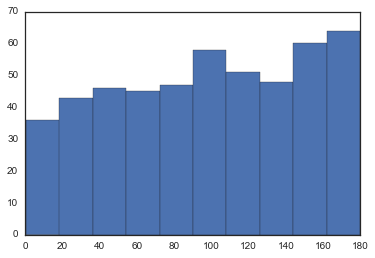

In [18]:
plt.hist(np.abs((180./3.14)*(anarr_12C['Plead.Phi()']-anarr_12C['Prec.Phi()'])));